In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('IMC Prosperity Results.csv', delimiter=';')

# Display the first few rows of the DataFrame
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,5.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,5.0


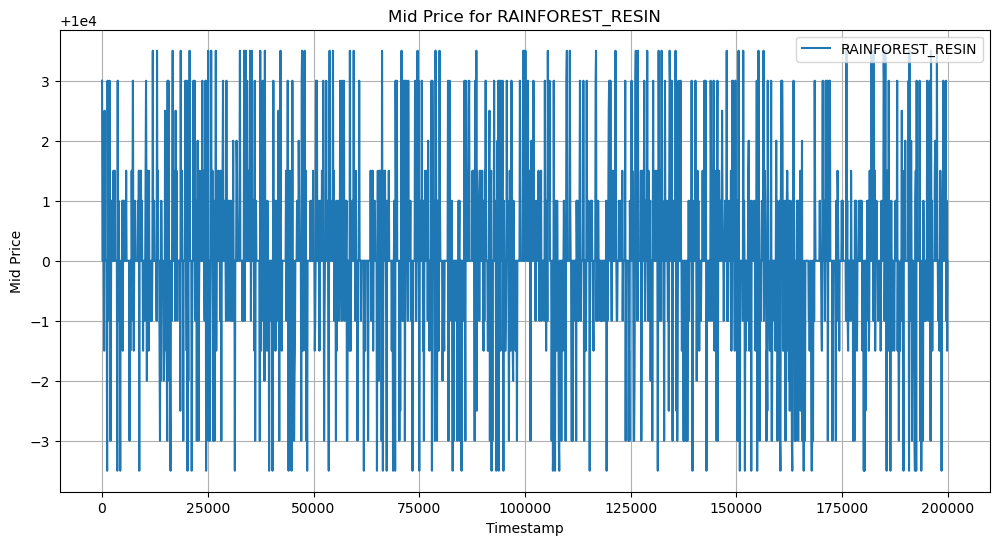

In [3]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each product
df_resin = df[df['product'] == 'RAINFOREST_RESIN']
df_kelp = df[df['product'] == 'KELP']

import matplotlib.pyplot as plt

# Plot for RAINFOREST_RESIN
plt.figure(figsize=(12, 6))
plt.plot(df_resin['timestamp'], df_resin['mid_price'], label='RAINFOREST_RESIN')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price for RAINFOREST_RESIN')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
df_kelp = df_kelp.copy()
df_kelp['returns'] = df_kelp['mid_price'].shift(1)-df_kelp['mid_price']

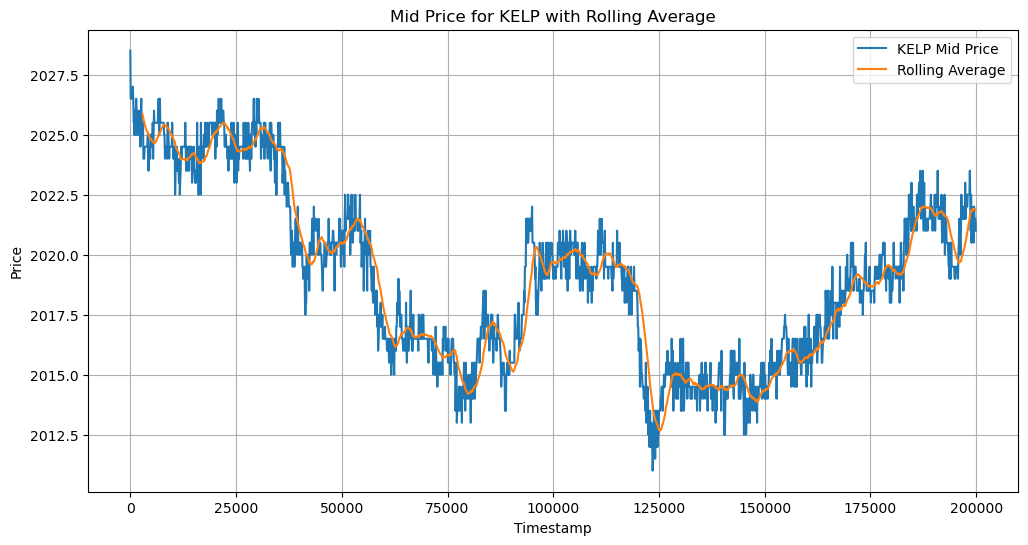

In [5]:
# Calculate the rolling average (change window size as needed)
df_kelp['rolling_mid_price'] = df_kelp['mid_price'].rolling(window=30).mean()

# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], df_kelp['mid_price'], label='KELP Mid Price')
plt.plot(df_kelp['timestamp'], df_kelp['rolling_mid_price'], label='Rolling Average', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

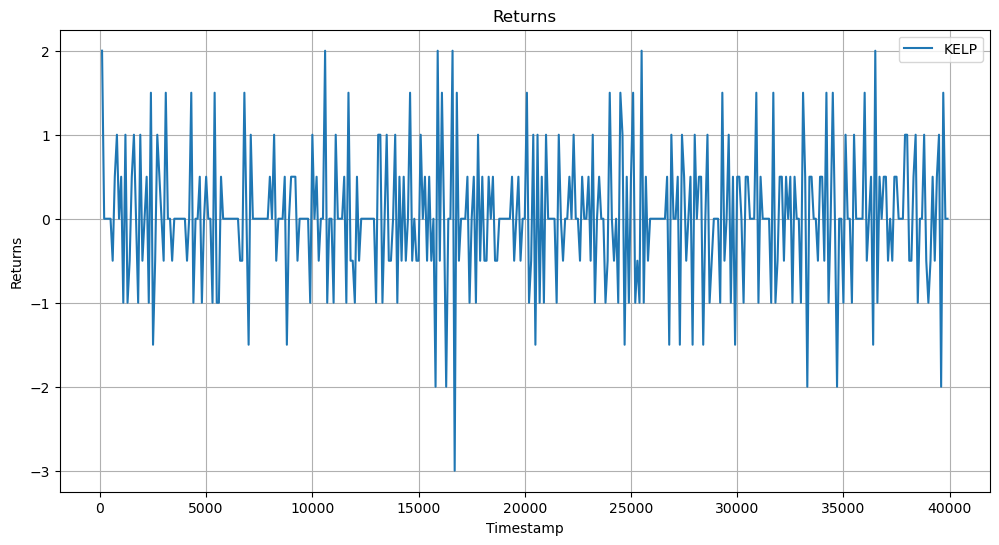

In [5]:
time = 400
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'][:time], df_kelp['returns'][:time], label='KELP')
plt.xlabel('Timestamp')
plt.ylabel('Returns')
plt.title('Returns')
plt.legend()
plt.grid(True)
plt.show()

Check what are the limits on the amount we can hold

In [6]:
import json

filename = "Submission Logs 7584b3a5.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
total_quantity = 0
total_paid = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity = item.get("quantity", 0)
        price = item.get("price", 0)
        total_quantity += quantity
        total_paid += price * quantity

print("Total quantity for buyer 'SUBMISSION':", total_quantity)
print("Total amount paid for buyer 'SUBMISSION':", total_paid)
print("Total revenue for buyer 'SUBMISSION':", total_quantity * 10000- total_paid )

Total quantity for buyer 'SUBMISSION': 50
Total amount paid for buyer 'SUBMISSION': 499900
Total revenue for buyer 'SUBMISSION': 100


In [ ]:
# import keyring
# keyring.delete_password("prosperity3submit", "prosperity-id-token")

PasswordDeleteError: prosperity3submit

In [ ]:
#

# Resin



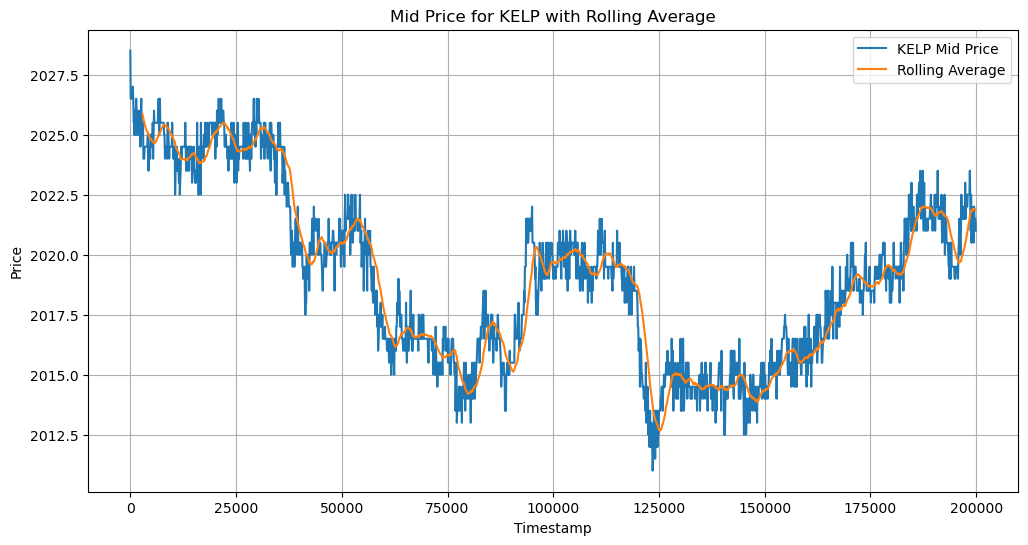

In [75]:
# Calculate the rolling average (change window size as needed)
df_kelp['rolling_mid_price'] = df_kelp['mid_price'].rolling(window=30).mean()

# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], df_kelp['mid_price'], label='KELP Mid Price')
plt.plot(df_kelp['timestamp'], df_kelp['rolling_mid_price'], label='Rolling Average', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

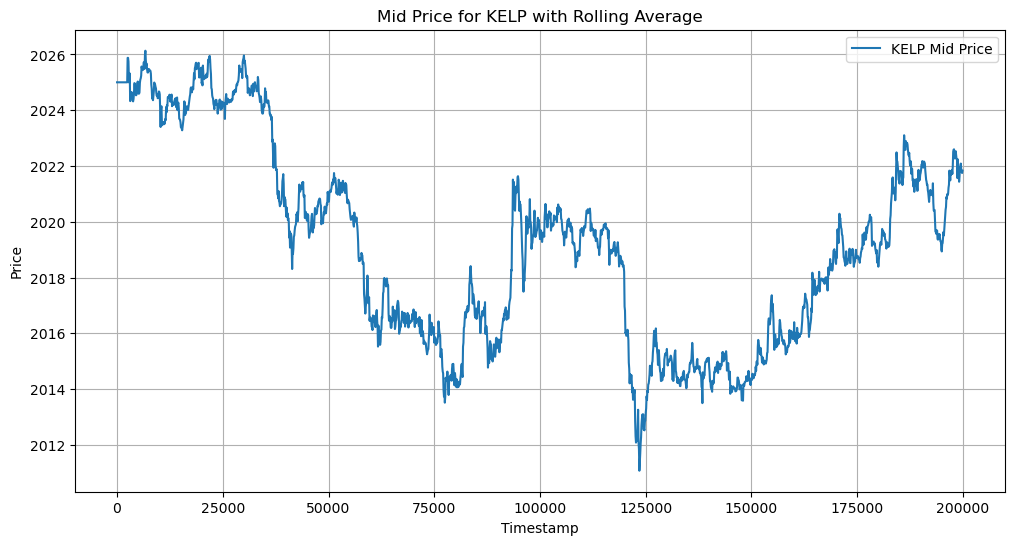

In [130]:
import pandas as pd

# Load the CSV file
df_fair = pd.read_csv('IMC Prosperity Results Fair.csv', delimiter=';')
df_fair = df_fair[df_fair['product']=='KELP']

# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], 2025+df_fair[df_fair['product']=='KELP']['profit_and_loss'], label='KELP Mid Price', linestyle='-')
#plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['mid_price'], label='Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

In [148]:
import pandas as pd

def calc_mmmid_price(row, adverse_volume=15):
    # Build dictionaries for ask and bid orders.
    sell_orders = {
        row['ask_price_1']: row['ask_volume_1'],
        row['ask_price_2']: row['ask_volume_2'],
        row['ask_price_3']: row['ask_volume_3']
    }
    buy_orders = {
        row['bid_price_1']: row['bid_volume_1'],
        row['bid_price_2']: row['bid_volume_2'],
        row['bid_price_3']: row['bid_volume_3']
    }
    
    # Check if both dictionaries have orders.
    if sell_orders and buy_orders:
        best_ask = min(sell_orders.keys())
        best_bid = max(buy_orders.keys())
        
        # Filter orders based on adverse_volume threshold.
        filtered_ask = [price for price in sell_orders if abs(sell_orders[price]) >= adverse_volume]
        filtered_bid = [price for price in buy_orders if abs(buy_orders[price]) >= adverse_volume]
        
        mm_ask = min(filtered_ask) if filtered_ask else None
        mm_bid = max(filtered_bid) if filtered_bid else None
        
        # Use filtered prices if available; otherwise fall back on best ask and bid.
        if mm_ask is None or mm_bid is None:
            mmmid_price = (best_ask + best_bid) / 2
        else:
            mmmid_price = (mm_ask + mm_bid) / 2
        return mmmid_price
    return None

def adjust_fair_value(current_mmmid, prev_mmmid, beta=-0.1):
    # For the first row or if the previous mmmid is not available, fair value equals current mmmid.
    if pd.isna(prev_mmmid) or prev_mmmid == 0:
        return current_mmmid
    # Calculate returns relative to the previous mmmid.
    last_returns = (current_mmmid - prev_mmmid) / prev_mmmid
    # Scale the return by beta.
    pred_returns = last_returns * beta
    # Adjust the mmmid price by the scaled return to compute fair value.
    fair = current_mmmid + (current_mmmid * pred_returns)
    return fair

def calc_vwap(row):
    # Retrieve ask prices and volumes, using .get() to avoid KeyError if a column is missing.
    ask_prices = [row.get('ask_price_1'), row.get('ask_price_2'), row.get('ask_price_3')]
    ask_volumes = [row.get('ask_volume_1'), row.get('ask_volume_2'), row.get('ask_volume_3')]
    bid_prices = [row.get('bid_price_1'), row.get('bid_price_2'), row.get('bid_price_3')]
    bid_volumes = [row.get('bid_volume_1'), row.get('bid_volume_2'), row.get('bid_volume_3')]
    
    # Filter out orders with missing or zero prices.
    valid_ask = [
        (price, volume) for price, volume in zip(ask_prices, ask_volumes)
        if pd.notna(price) and price != 0 and pd.notna(volume)
    ]
    valid_bid = [
        (price, volume) for price, volume in zip(bid_prices, bid_volumes)
        if pd.notna(price) and price != 0 and pd.notna(volume)
    ]
    
    # Calculate total value and volume for valid ask orders.
    total_ask_value = sum(price * abs(volume) for price, volume in valid_ask)
    total_ask_volume = sum(abs(volume) for _, volume in valid_ask)
    
    # Calculate total value and volume for valid bid orders.
    total_bid_value = sum(price * abs(volume) for price, volume in valid_bid)
    total_bid_volume = sum(abs(volume) for _, volume in valid_bid)
    
    total_value = total_ask_value + total_bid_value
    total_volume = total_ask_volume + total_bid_volume
    
    if total_volume > 0:
        return total_value / total_volume
    else:
        return None

# Calculate mmmid price for each row.
df_fair['mmmid_price_calc'] = df_fair.apply(calc_mmmid_price, axis=1)

# Create a column with the previous row's mmmid price for regression adjustment.
df_fair['prev_mmmid'] = df_fair['mmmid_price_calc'].shift(1)

# Compute the regression-adjusted fair value.
df_fair['fair_value'] = df_fair.apply(
    lambda row: adjust_fair_value(row['mmmid_price_calc'], row['prev_mmmid'], beta=-0.19), axis=1
)

# Compute VWAP for each row.
df_fair['vwap'] = df_fair.apply(calc_vwap, axis=1)

# Example: Print the first row's values.
print("mmmid_price for the first row:", df_fair.iloc[0]['mmmid_price_calc'])
print("Fair value for the first row:", df_fair.iloc[0]['fair_value'])
print("VWAP for the first row:", df_fair.iloc[0]['vwap'])

mmmid_price for the first row: 2027.0
Fair value for the first row: 2027.0
VWAP for the first row: 2027.047619047619


In [149]:
import numpy as np

def total_error(beta, df):
    # Compute the predicted fair value for each row using the given beta.
    predicted = df.apply(lambda row: adjust_fair_value(row['mmmid_price_calc'], row['prev_mmmid'], beta), axis=1)
    # Compute total squared error relative to profit_and_loss column.
    error = np.sum((predicted - 2025 -df['profit_and_loss'])**2)
    return error

# Define a range of beta values to test.
beta_values = np.linspace(-0.5, 0, 400)  # for example, from -1 to 1 with 0.01 step
errors = [total_error(beta, df_fair) for beta in beta_values]

# Find the beta that minimizes the error.
optimal_index = np.argmin(errors)
optimal_beta = beta_values[optimal_index]

print("Optimal beta:", optimal_beta)

Optimal beta: -0.19047619047619047


In [146]:
errors

[np.float64(96.11168136669392),
 np.float64(95.94389044355017),
 np.float64(95.77677944440997),
 np.float64(95.61034836926531),
 np.float64(95.44459721812439),
 np.float64(95.27952599098485),
 np.float64(95.11513468784709),
 np.float64(94.95142330870962),
 np.float64(94.78839185356713),
 np.float64(94.62604032243503),
 np.float64(94.4643687152998),
 np.float64(94.30337703216351),
 np.float64(94.14306527303387),
 np.float64(93.98343343789959),
 np.float64(93.82448152676618),
 np.float64(93.66620953963667),
 np.float64(93.50861747650889),
 np.float64(93.35170533738265),
 np.float64(93.19547312225635),
 np.float64(93.03992083113178),
 np.float64(92.88504846400849),
 np.float64(92.73085602088543),
 np.float64(92.57734350176187),
 np.float64(92.42451090664143),
 np.float64(92.27235823551949),
 np.float64(92.12088548840256),
 np.float64(91.97009266528447),
 np.float64(91.81997976616674),
 np.float64(91.67054679105362),
 np.float64(91.52179373993836),
 np.float64(91.37372061281692),
 np.float

In [123]:
df_fair.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mmmid_price_calc,prev_mmmid,fair_value,vwap
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,...,NaN,NaN,NaN,NaN,2028.5,0.0,2027.0,NaN,2027.000000,None
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,...,2029.0,22.0,NaN,NaN,2026.5,0.0,2027.0,2027.0,2027.000000,None
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,...,NaN,NaN,NaN,NaN,2026.5,0.0,2026.5,2027.0,2026.549988,None
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,...,2029.0,29.0,NaN,NaN,2026.5,0.0,2027.0,2026.5,2026.949988,None
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,...,NaN,NaN,NaN,NaN,2026.5,0.0,2026.5,2027.0,2026.549988,None


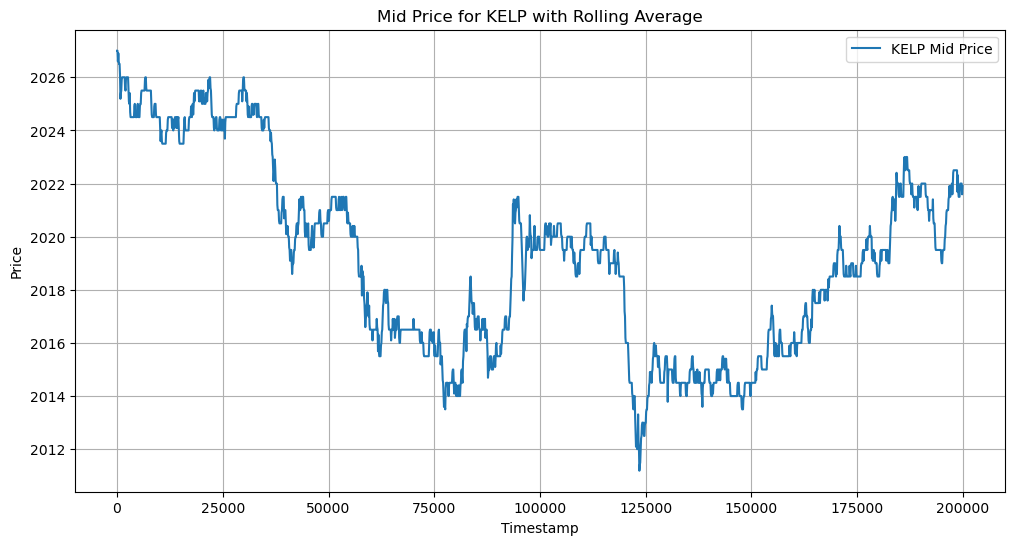

In [147]:
# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['fair_value'], label='KELP Mid Price', linestyle='-')
#plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['mid_price'], label='Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

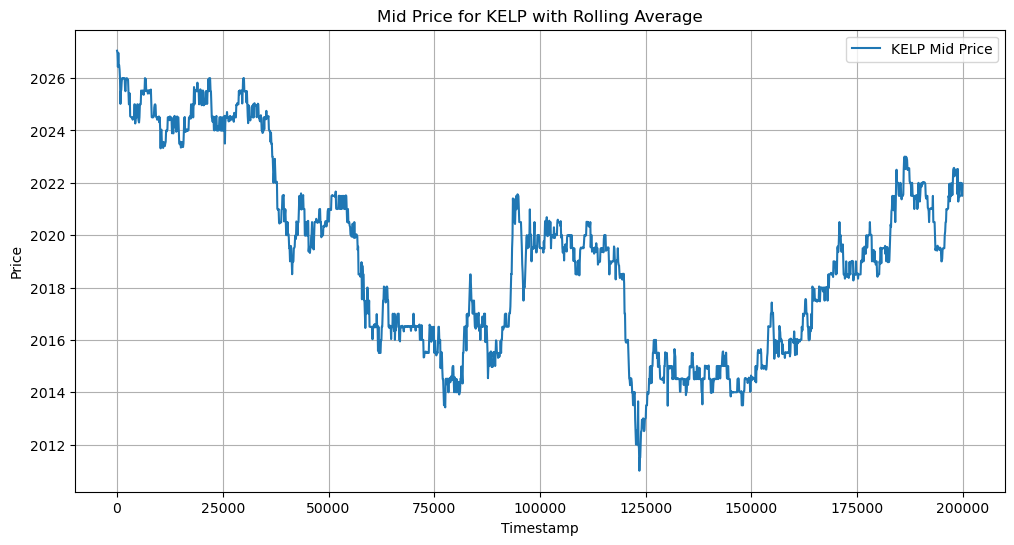

In [ ]:
# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['vwap'], label='KELP Mid Price', linestyle='-')
#plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['mid_price'], label='Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

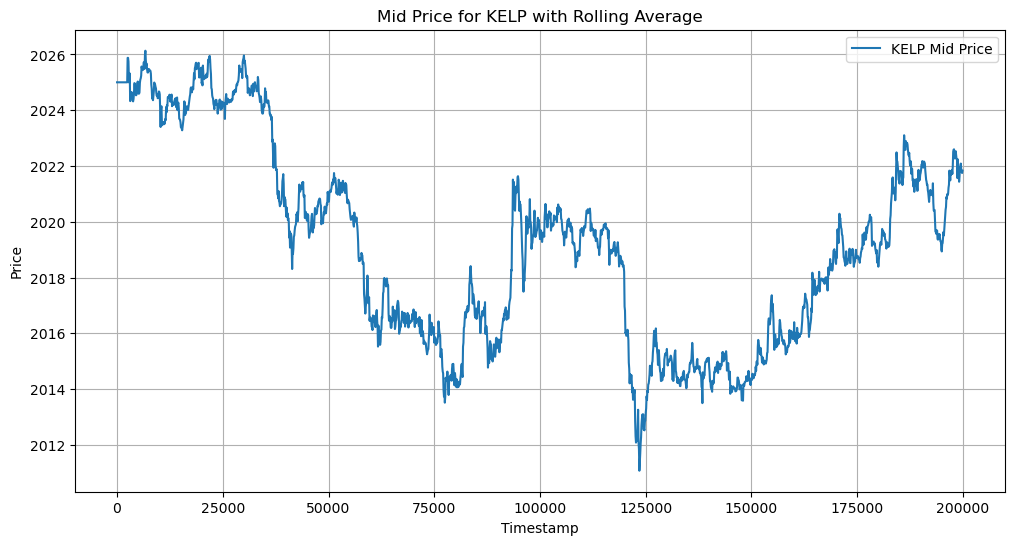

In [166]:
# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], 2025+ df_fair[df_fair['product']=='KELP']['profit_and_loss'], label='KELP Mid Price', linestyle='-')
#plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['mid_price'], label='Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

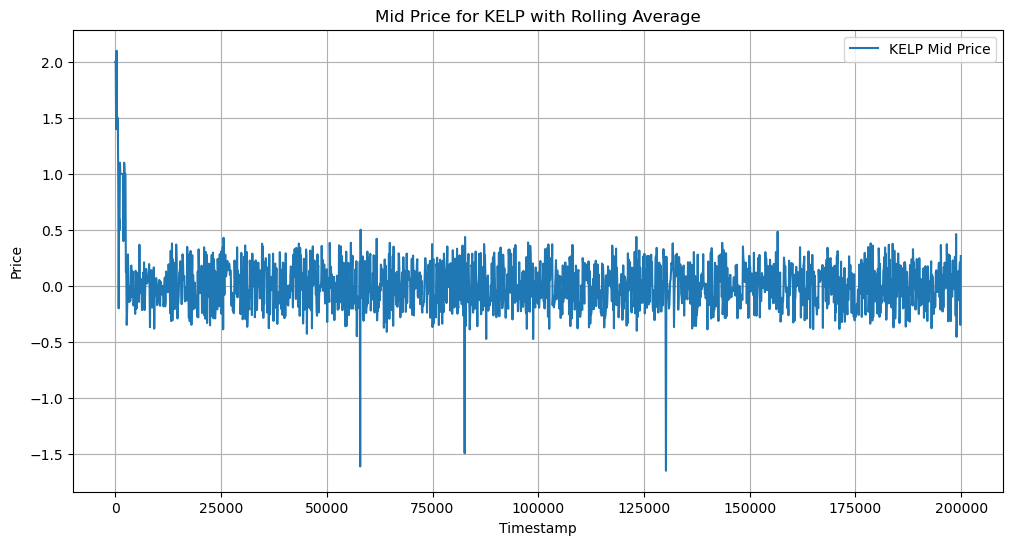

In [137]:
# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['fair_value']-(2025 +df_fair[df_fair['product']=='KELP']['profit_and_loss']), label='KELP Mid Price', linestyle='-')
#plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['mid_price'], label='Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

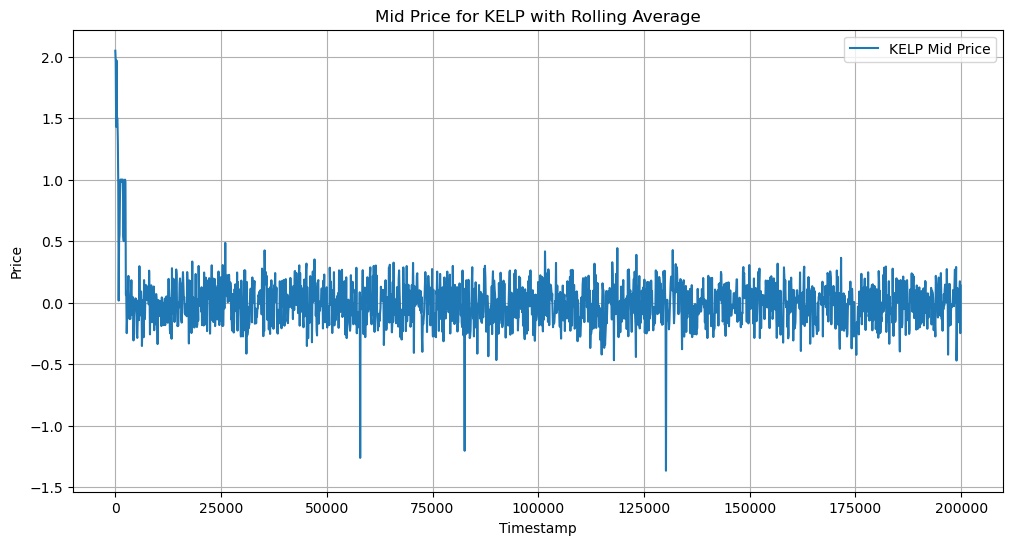

In [152]:
# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['vwap']-(2025 +df_fair[df_fair['product']=='KELP']['profit_and_loss']), label='KELP Mid Price', linestyle='-')
#plt.plot(df_fair[df_fair['product']=='KELP']['timestamp'], df_fair[df_fair['product']=='KELP']['mid_price'], label='Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
df_fair

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mmmid_price_calc,prev_mmmid,fair_value,vwap
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,...,NaN,NaN,NaN,NaN,2028.5,0.000000,2027.0,NaN,2027.000000,2027.047619
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,...,2029.0,22.0,NaN,NaN,2026.5,0.000000,2027.0,2027.0,2027.000000,2026.958333
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,...,NaN,NaN,NaN,NaN,2026.5,0.000000,2026.5,2027.0,2026.594977,2026.428571
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,...,2029.0,29.0,NaN,NaN,2026.5,0.000000,2027.0,2026.5,2026.904977,2026.967742
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,...,NaN,NaN,NaN,NaN,2026.5,0.000000,2026.5,2027.0,2026.594977,2026.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,...,NaN,NaN,NaN,NaN,2022.0,-2.913452,2022.0,2022.0,2022.000000,2022.000000
3992,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,...,2024.0,21.0,NaN,NaN,2021.5,-3.122681,2022.0,2022.0,2022.000000,2021.977273
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,...,2024.0,25.0,NaN,NaN,2021.5,-3.210571,2022.0,2022.0,2022.000000,2021.962963
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,...,NaN,NaN,NaN,NaN,2021.5,-3.251953,2021.5,2022.0,2021.594977,2021.500000


Which fair price is better??


In [168]:
error = np.sum((df_fair['vwap'] - 2025 -df_fair['profit_and_loss'])**2)
error

np.float64(85.91615122043007)

In [167]:
error = np.sum((df_fair['fair_value'] - 2025 -df_fair['profit_and_loss'])**2)
error

np.float64(75.32407144640733)

In [8]:
def compute_rsi(series, period):
    delta = np.diff(series)
    delta = np.concatenate(([0], delta))
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(period, min_periods=period).mean()
    avg_loss = pd.Series(loss).rolling(period, min_periods=period).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(50).values

In [9]:
import time
import pandas as pd
import numpy as np
from backtesting import Backtest, Strategy
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'backtesting'

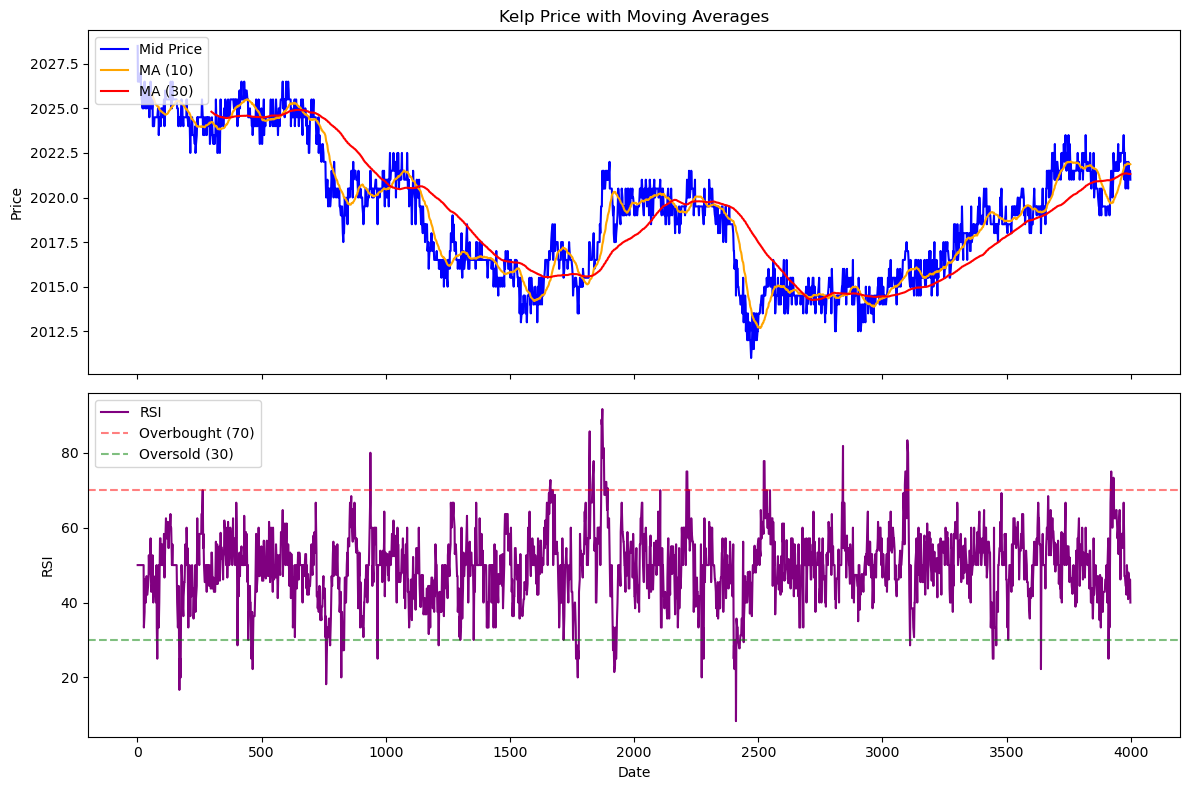

In [10]:
import matplotlib.pyplot as plt

# --- Create moving averages (fast and slow) using mid_price ---
df_kelp['MA_fast'] = df_kelp['mid_price'].rolling(window=30).mean()
df_kelp['MA_slow'] = df_kelp['mid_price'].rolling(window=150).mean()

# --- Compute RSI (using mid_price instead of Close, period=14) ---
df_kelp['RSI'] = compute_rsi(df_kelp['mid_price'].values, 14)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top subplot: mid_price and moving averages
ax1.plot(df_kelp.index, df_kelp['mid_price'], label='Mid Price', color='blue')
ax1.plot(df_kelp.index, df_kelp['MA_fast'], label='MA (10)', color='orange')
ax1.plot(df_kelp.index, df_kelp['MA_slow'], label='MA (30)', color='red')
ax1.set_ylabel('Price')
ax1.set_title('Kelp Price with Moving Averages')
ax1.legend(loc='upper left')

# Bottom subplot: RSI
ax2.plot(df_kelp.index, df_kelp['RSI'], label='RSI', color='purple')
ax2.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [6]:
df_kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,returns,rolling_mid_price
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0,NaN,NaN
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0,2.0,NaN
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0,0.0,NaN
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0,0.0,NaN
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0,-1.5,2021.883333
3992,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0,0.5,2021.883333
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0,0.0,2021.883333
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,0.0,0.0,2021.883333


In [62]:
import json

filename = "Submission Logs 7584b3a5.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
total_quantity = 0
total_paid = 0
quantities = []
for item in data:
    if item.get("symbol") == "RAINFOREST_RESIN":
        quantity = item.get("quantity", 0)
        quantities.append(quantity)




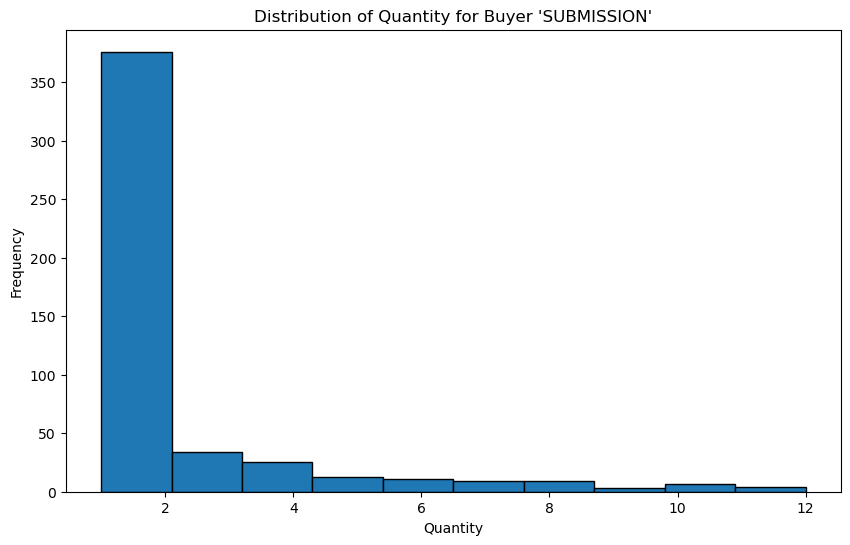

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(quantities, bins=10, edgecolor='black')
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Quantity for Buyer 'SUBMISSION'")
plt.show()

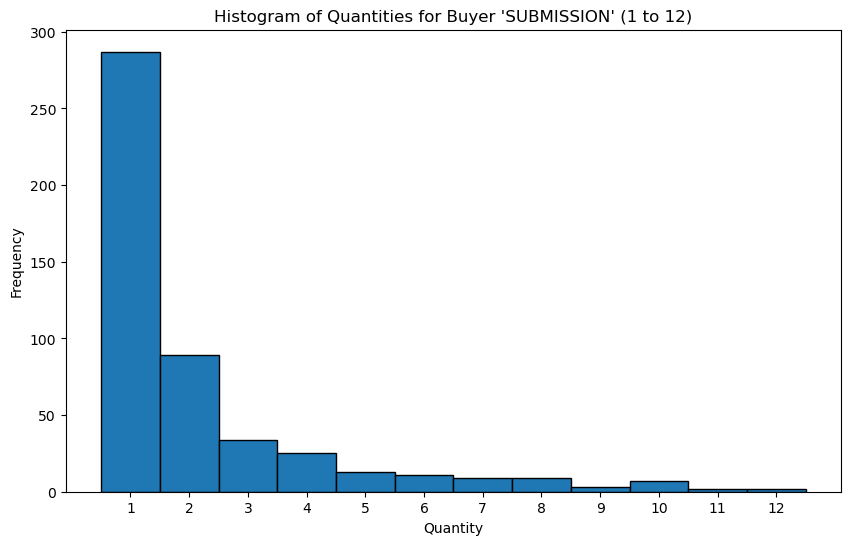

In [68]:
# Filter quantities to include only numbers between 1 and 12
filtered_quantities = [q for q in quantities if 1 <= q <= 12]

# Create bin edges so that each integer from 1 to 12 has its own bin
bins = np.arange(0.5, 13.5, 1)

plt.figure(figsize=(10, 6))
plt.hist(filtered_quantities, bins=bins, edgecolor='black')
plt.xticks(range(1, 13))
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Histogram of Quantities for Buyer 'SUBMISSION' (1 to 12)")
plt.show()

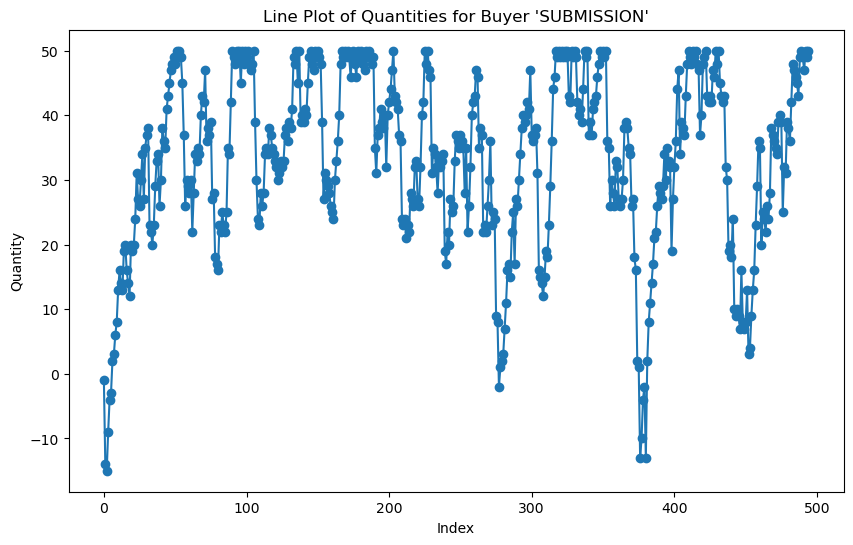

In [74]:
import json

filename = "../submissions/2025-04-01_20-41-30.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
quantities = []
quantity = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity += item.get("quantity", 0)
        quantities.append(quantity)
    elif item.get("seller") == "SUBMISSION":
        quantity -= item.get("quantity", 0)
        quantities.append(quantity)
# Plot the quantities as a line plot
plt.figure(figsize=(10, 6))
plt.plot(quantities, marker='o', linestyle='-')
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.title("Line Plot of Quantities for Buyer 'SUBMISSION'")
plt.show()

## Is is even mean reverting or what locally?

In [12]:
df_kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,returns,rolling_mid_price,MA_fast,MA_slow,RSI
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,...,NaN,NaN,NaN,2028.5,0.0,NaN,NaN,NaN,NaN,50.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,...,22.0,NaN,NaN,2026.5,0.0,2.0,NaN,NaN,NaN,50.000000
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,...,NaN,NaN,NaN,2026.5,0.0,0.0,NaN,NaN,NaN,50.000000
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,...,29.0,NaN,NaN,2026.5,0.0,0.0,NaN,NaN,NaN,50.000000
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,...,NaN,NaN,NaN,2026.5,0.0,0.0,NaN,NaN,NaN,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,...,NaN,NaN,NaN,2022.0,0.0,-1.5,2021.883333,2021.883333,2021.323333,48.000000
3992,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,...,21.0,NaN,NaN,2021.5,0.0,0.5,2021.883333,2021.883333,2021.326667,46.153846
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,...,25.0,NaN,NaN,2021.5,0.0,0.0,2021.883333,2021.883333,2021.316667,46.153846
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,...,NaN,NaN,NaN,2021.5,0.0,0.0,2021.883333,2021.883333,2021.320000,46.153846


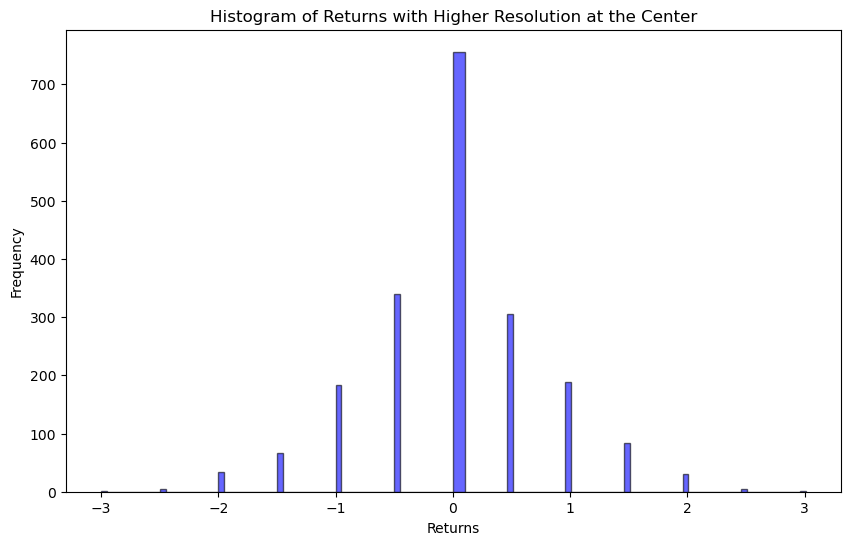

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Assuming df_kelp has a 'returns' column
returns = df_kelp['returns'].dropna()

# Define a fixed bin width
bin_width = 0.1

# Compute the minimum and maximum edges systematically
min_edge = np.floor(returns.min() / bin_width) * bin_width
max_edge = np.ceil(returns.max() / bin_width) * bin_width

# Create bin edges with a constant interval of bin_width
bins = np.arange(min_edge, max_edge + bin_width, bin_width)

plt.figure(figsize=(10, 6))

# Plot histogram with rwidth=1 to remove gaps between bars
plt.hist(returns,density=True, bins = 1,rwidth=1)#, bins=bins, density=True, alpha=0.6, color='blue', edgecolor='black', rwidth=2)

# Plot density curve for a smooth view
density = gaussian_kde(returns)
xs = np.linspace(returns.min(), returns.max(), 200)
plt.plot(xs, density(xs), 'red', lw=2)

plt.xlabel("Returns")
plt.ylabel("Density")
plt.title("Distribution of Returns between Midprice and Last Price")
plt.show()

## $\beta$ estimation

df_kelp

In [41]:
df_kelp.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss',
       'returns', 'rolling_mid_price', 'MA_fast', 'MA_slow', 'RSI'],
      dtype='object')

In [ ]:
import pandas as pd

# Example function to compute mmmid_price for a single row
def calc_mmmid_price(row, adverse_volume=15):
    # Build dictionaries for ask and bid orders
    sell_orders = {
        row['ask_price_1']: row['ask_volume_1'],
        row['ask_price_2']: row['ask_volume_2'],
        row['ask_price_3']: row['ask_volume_3']
    }
    buy_orders = {
        row['bid_price_1']: row['bid_volume_1'],
        row['bid_price_2']: row['bid_volume_2'],
        row['bid_price_3']: row['bid_volume_3']
    }
    
    # Check if both dictionaries have orders
    if sell_orders and buy_orders:
        best_ask = min(sell_orders.keys())
        best_bid = max(buy_orders.keys())
        
        # Filter orders based on adverse_volume
        filtered_ask = [price for price in sell_orders.keys() if abs(sell_orders[price]) >= adverse_volume]
        filtered_bid = [price for price in buy_orders.keys() if abs(buy_orders[price]) >= adverse_volume]
        
        mm_ask = min(filtered_ask) if filtered_ask else None
        mm_bid = max(filtered_bid) if filtered_bid else None
        
        if mm_ask is None or mm_bid is None:
            mmmid_price = (best_ask + best_bid) / 2
        else:
            mmmid_price = (mm_ask + mm_bid) / 2
        return mmmid_price
    return None

# Assuming df_kelp is your DataFrame, calculate mmmid_price for each row.
df_kelp['mmmid_price_calc'] = df_kelp.apply(calc_mmmid_price, axis=1)

# To get the calculated mmmid_price for the first row (index 0):
# mmmid_price_first_row = df_kelp.iloc[0][ 'mmmid_price_calc']
# print("mmmid_price for the first row:", mmmid_price_first_row)

mmmid_price for the first row: 2027.0


In [63]:
df_kelp['ask_price_1'][2]

np.int64(2028)

In [67]:
(df_kelp['bid_price_1'][1]*df_kelp['bid_volume_1'][1] +
 df_kelp['bid_price_2'][1]*df_kelp['bid_volume_2'][1] +
 df_kelp['bid_price_3'][1]*df_kelp['bid_volume_3'][1]+
   + df_kelp['ask_price_1'][1]*df_kelp['ask_volume_1'][1])/(df_kelp['ask_volume_1'][1] + df_kelp['bid_volume_1'][1] +df_kelp['bid_volume_3'][1] + df_kelp['bid_volume_2'][1])

np.float64(2027.047619047619)

                            OLS Regression Results                            
Dep. Variable:        realized_return   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     88.18
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.57e-20
Time:                        16:55:45   Log-Likelihood:                 14634.
No. Observations:                1998   AIC:                        -2.926e+04
Df Residuals:                    1996   BIC:                        -2.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -1.5e-06   3.57e-06     -0.420      

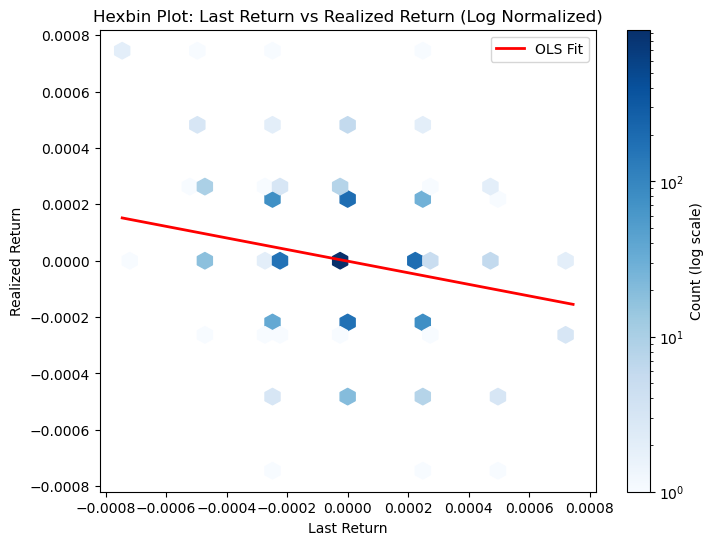

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_kelp already contains the 'mmmid_price_calc' column computed earlier.
# Compute the returns:
df_kelp['last_return'] = df_kelp['mmmid_price_calc'].pct_change()
df_kelp['realized_return'] = df_kelp['mmmid_price_calc'].pct_change().shift(-1)

# Drop rows with NaN values
df_clean = df_kelp.dropna(subset=['last_return', 'realized_return'])

# Plot the data to verify the relationship# Create the hexbin plot
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df_clean['last_return'], df_clean['realized_return'], gridsize=30, cmap='Blues',
                norm=colors.LogNorm(), mincnt=1)
plt.colorbar(label='Count (log scale)')
plt.xlabel('Last Return')
plt.ylabel('Realized Return')
plt.title('Hexbin Plot: Last Return vs Realized Return (Log Normalized)')

# Set up the independent variable (X) and dependent variable (Y) for OLS
X = df_clean['last_return']
Y = df_clean['realized_return']
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

# Extract regression coefficients
intercept, slope = model.params

# Create a sequence of x-values spanning the data range
x_vals = np.linspace(df_clean['last_return'].min(), df_clean['last_return'].max(), 100)
# Compute the corresponding y-values from the OLS model
y_vals = intercept + slope * x_vals

# Plot the regression line on top of the hexbin plot
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='OLS Fit')
plt.legend()
plt.show()

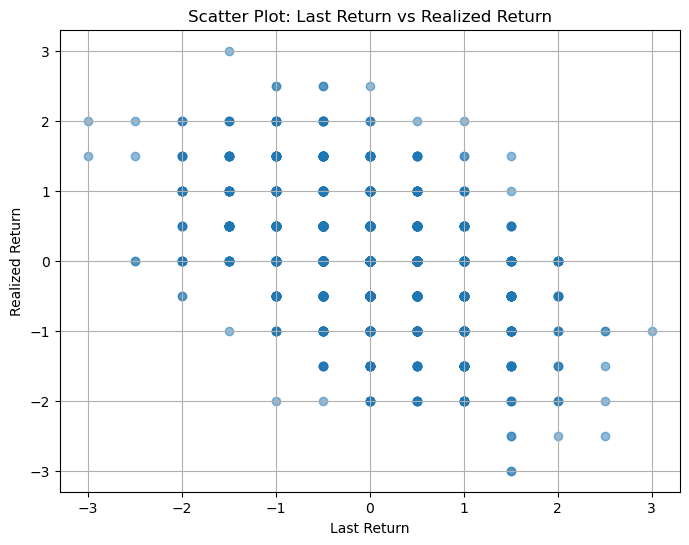

                            OLS Regression Results                            
Dep. Variable:        realized_return   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     501.7
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.59e-99
Time:                        15:17:26   Log-Likelihood:                -2112.9
No. Observations:                1998   AIC:                             4230.
Df Residuals:                    1996   BIC:                             4241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0047      0.016      0.304      

In [55]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure you have your 'returns' column in df_kelp.
# Create two new columns: one for last return and one for realized return.
df_kelp['last_return'] = df_kelp['returns'].shift(-1)  # Shifts returns upward: previous value becomes predictor.
df_kelp['realized_return'] = df_kelp['returns']

# Drop rows that contain NaN values (which occur due to shifting)
df_clean = df_kelp.dropna(subset=['last_return', 'realized_return'])

# Plot the data to verify the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['last_return'], df_clean['realized_return'], alpha=0.5)
plt.xlabel('Last Return')
plt.ylabel('Realized Return')
plt.title('Scatter Plot: Last Return vs Realized Return')
plt.grid(True)
plt.show()

# Set up the independent variable (X) and dependent variable (Y)
X = df_clean['last_return']
Y = df_clean['realized_return']

# Add a constant to include an intercept in the model
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Print the regression summary which includes the estimated beta (slope) and other statistics
print(model.summary())